In [1]:
import pandas as pd
import numpy as np
import json
import requests as req
from citipy import citipy
import matplotlib.pyplot as plt

from API_Key import API_Key

In [2]:
num_of_cities = 2000
latitude = np.random.uniform(-90,90, size = num_of_cities)
longitude = np.random.uniform(-180,180,size = num_of_cities)
coord = pd.DataFrame(latitude, longitude)
coord = coord.reset_index()
coord = coord.rename(columns = {'index':'latitude',0:'longitude'})
#coor

In [3]:
cities = []
country = []
for index, row in coord.iterrows():
    lat = row['latitude']
    lng = row['longitude']
    city = citipy.nearest_city(lat,lng)
    cities.append(city.city_name)
    country.append(city.country_code)

In [4]:
cities_df = pd.DataFrame(cities)
cities_df['country_code'] = pd.DataFrame(country)
cities_df = cities_df.rename(columns = {0 : 'city_name'})
cities_df['latitude'] = coord['latitude']
cities_df['longitude'] = coord['longitude']
cities_df['temperature'] = ''
cities_df['humidity'] = ''
cities_df['cloudiness'] =''
cities_df['wind_speed'] = ''

In [5]:
units = 'imperial'

for index, row in cities_df.iterrows():
    url = 'http://api.openweathermap.org/data/2.5/weather?'

    city = row[0]
    query_url = f'{url}appid={API_Key}&q={city}&units={units}'
    city_weather = req.get(query_url)
    weather_json = city_weather.json()
    #print(weather_json)
    try:
        temp = weather_json['main']['temp']
        humid = weather_json['main']['humidity']
        cloud = weather_json['clouds']['all']
        wind = weather_json['wind']['speed']
        cities_df.set_value(index,'temperature', temp)
        cities_df.set_value(index, 'humidity', humid)
        cities_df.set_value(index, 'cloudiness', cloud)
        cities_df.set_value(index, 'wind_speed', wind)
        #print(temperature)
    except:
        continue

#append cities_df with temp and other data

In [6]:
cities_df

,city_name,country_code,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,barentsburg,sj,106.182638,11.544275,,,,
1,qaanaaq,gl,153.233012,-70.055582,11.17,95,80,2.91
2,ushuaia,ar,-143.326914,-50.205515,50,76,40,5.82
3,east london,za,-63.211176,45.904449,75.16,100,80,20.02
4,barentsburg,sj,130.241657,-10.334996,,,,
5,bredasdorp,za,-111.852417,20.282089,69.8,83,32,9.17
6,barentsburg,sj,82.426784,-4.113976,,,,
7,longyearbyen,sj,116.756921,29.165523,10.4,43,0,17.22
8,ushuaia,ar,-149.950499,-53.907466,50,76,40,5.82
9,taoudenni,ml,21.135110,-5.321656,72.37,30,8,2.68


In [7]:
cities_df.replace('', np.nan, inplace= True)
cities_df = cities_df.drop_duplicates(subset=['city_name','country_code'], keep=False)
cities_df = cities_df.dropna()
cities_df

,city_name,country_code,latitude,longitude,temperature,humidity,cloudiness,wind_speed
11,changji,cn,45.741645,87.468952,61.98,94.0,64.0,6.15
17,mbour,sn,13.814732,-17.467726,66.20,93.0,20.0,6.93
19,eravur,lk,7.596055,81.434573,78.04,100.0,0.0,3.24
30,key west,us,25.226340,-81.774830,26.60,63.0,1.0,17.22
31,bud,no,70.277897,3.857747,31.44,68.0,40.0,9.17
32,moche,pe,-8.523542,-79.409290,69.80,83.0,0.0,12.75
39,hargeysa,so,7.171561,43.966624,62.11,85.0,64.0,3.02
40,tevriz,ru,58.613033,72.987361,19.32,91.0,68.0,5.48
43,port-gentil,ga,0.363873,6.036371,78.80,94.0,90.0,6.93
47,trelew,ar,-42.631841,-65.939044,78.67,30.0,0.0,15.21


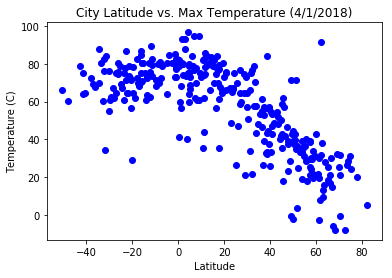

In [17]:
x_axis = cities_df['latitude']
y_temp_axis = cities_df['temperature']

plt.plot(x_axis,y_temp_axis, marker='o', color='blue', linewidth = 0)
plt.title('City Latitude vs. Max Temperature (4/1/2018)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

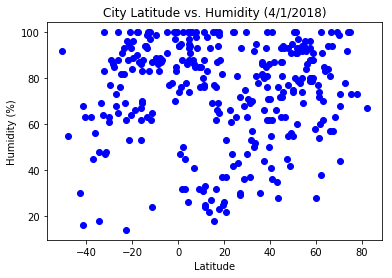

In [9]:
y_humid_axis = cities_df['humidity']

plt.plot(x_axis,y_humid_axis, marker='o', color='blue', linewidth = 0)
plt.title('City Latitude vs. Humidity (4/1/2018)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

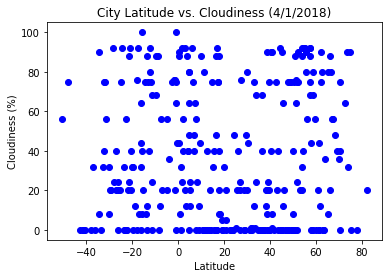

In [10]:
y_cloud_axis = cities_df['cloudiness']

plt.plot(x_axis,y_cloud_axis, marker='o', color='blue', linewidth = 0)
plt.title('City Latitude vs. Cloudiness (4/1/2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

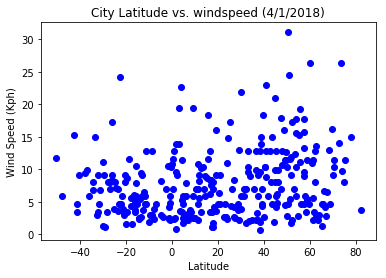

In [11]:
y_wind_axis = cities_df['wind_speed']

plt.plot(x_axis,y_wind_axis, marker='o', color='blue', linewidth = 0)
plt.title('City Latitude vs. windspeed (4/1/2018)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (Kph)')
plt.show()

In [12]:
cities_df.to_csv('CitiesWeatherData.csv')